Spectrum of a signal, corrupted with noise.


In [3]:
version = 'v04 2016-09-02 by Andrei Sukhanov' # Converted to jupyter notebook.
import numpy as np
import scipy as sc
import scipy.signal as signal
import matplotlib.pyplot as plt

# select one of the following two options inline or qt (or gtk if qt is not available):
#%matplotlib qt
%matplotlib inline 

# global variables
#signal_length = 10e4

Define different test signals.

In [4]:
def signal_comb( signal_frequency, sling_frequency, nsamples ):
    ''' Comb signal, 'nsamples' long, with spikes every 'signal_frequency' sample.
    '''    
    isignal = np.zeros(int(nsamples))
    for ii in range(0,int(nsamples),int(sling_frequency/signal_frequency)):
        isignal[ii] = 1.
    return isignal

In [5]:
def signal_sine( signal_frequency, sling_frequency, nsamples):
    ''' Sine wave
    '''
    x = signal_frequency*np.arange(nsamples)/sling_frequency
    return np.sin(2*np.pi*x)

In [6]:
def signal_wave_packet( signal_frequency, sling_frequency, nsamples ):
    ''' Wave packet
    '''
    x = np.arange(nsamples)/sling_frequency - 1.
    return np.cos(2*np.pi*signal_frequency*x)*np.exp(-2*np.pi*x**2)

In [26]:
def ff(fs=10e3, shape='sine', plotit=True):
    ''' Generate and process a test signal with 'signal_amplitude' and 'signal_frequency' 
    corrupted by noise with 'noise_rms' sampled at 'sampling_frequency'.
    '''
    ff.version = version
    np.random.seed(1234)
    
    # signal
    if shape == 'comb':
        isignal = signal_comb(signal_frequency , fs, signal_length)*signal_amplitude
    elif shape == 'wave_packet':
        isignal = signal_wave_packet( signal_frequency, fs, signal_length)*signal_amplitude
    else: 
        if shape != 'sine':
            print('WARNING: Unrecognizable shape '+shape+' using sine instead')
            shape = 'sine'
        isignal = signal_sine( signal_frequency, fs, signal_length)*signal_amplitude

    print('      Signal: '+shape+', '+str(signal_amplitude)+' V, '+str(signal_frequency)+' Hz,'
         +' sampling '+str(int(fs/1e3))+' kHz, time '+str(signal_length/fs)+' s.')    
    time = np.arange(signal_length) / fs
    
    # noise
    inoise = np.random.normal(scale=noise_rms, size=time.shape)
    
    signoise = isignal + inoise
    print('time_domain rms['+str(len(signoise))+']='+str(np.sqrt(np.mean(signoise**2)))
            + ', noise rms = '+str(np.sqrt(np.mean(inoise**2))))
    #        + ', power[' + '] = '+str(np.sum(signoise**2)) 
    #        + ', sum abs=' + str(np.sum(np.abs(signoise))))

    # plot it
    if plotit:
        plt.figure()
        plt.plot(time,signoise)
        plt.plot(time,isignal)
        plt.xlabel('Time[s]')
        plt.ylabel('amplitude')
        plt.show()
    '''
    Compute and plot the power spectral density.
    xx, Pxx_den = sc.signal.periodogram(signoise, fs)
    if plotit:    
        plt.figure()
        plt.semilogy(xx, Pxx_den)
        #plt.ylim([1e-7, 1e2])
        plt.xlabel('frequency [Hz]')
        plt.ylabel('PSD [V**2/Hz]')
        plt.show()    
    print('mean power density = ' + str(Pxx_den.mean())
            + ' [V**2/Hz], Peak ' + str(Pxx_den.max())
            + ' [V**2/Hz] at ' + str(xx[Pxx_den.argmax()]))
    print('total spectral power = '+str(np.sum(Pxx_den*xx))+' V**2')
    '''
    '''
    Now compute and plot the power spectrum.
    '''
    xx, ff.Pxx_spec = (sc.signal).periodogram(signoise, fs, 
#         'flattop', # do not use windowing, it breaks calibration
                                         scaling='spectrum')
    yy = ff.Pxx_spec
    print('frequency domain rms['+str(len(yy))+'] = '+str(np.sqrt(yy.sum()))
            + ' total energy = '+str(np.sum(yy*xx)))
    if plotit:    
        plt.figure()
        plt.semilogy(xx, yy)
        plt.ylim([1e-8, 1e1])
        plt.xlabel('frequency [Hz]')
        plt.ylabel('Linear spectrum [V RMS]')
    print('The peak height in the power spectrum = ' + 
         str(yy.max())+' V at '+ str(xx[yy.argmax()]))
    plt.show()


Set parameters.

In [27]:
noise_rms = 1. # Volts
signal_length = 1e3 # samples
signal_amplitude = 1.0 # Volts

# uncomment for sine wave
#signal_frequency = 100 # Hz
#sampling_frequency = 10e3 # Hz
#signal_shape = 'sine' # use 'comb' or 'sine' or 'wave_packet'

#uncomment for wave packet signal
noise_rms = 0.2
signal_frequency = 10 # Hz
sampling_frequency = 500 # Hz
signal_shape = 'wave_packet' # use 'comb' or 'sine' or 'wave_packet'

#uncomment for comb signal
#signal_frequency = 100 # Hz
#sampling_frequency = 10e3 # Hz
#signal_shape = 'comb' # use 'comb' or 'sine' or 'wave_packet'

      Signal: wave_packet, 1.0 V, 10 Hz, sampling 0 kHz, time 2.0 s.
time_domain rms[1000]=0.402271322589, noise rms = 0.194638700602


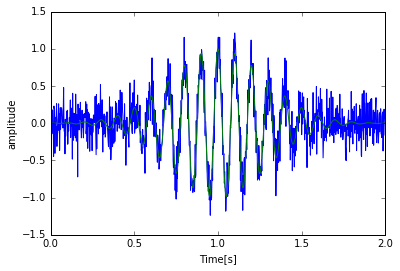

frequency domain rms[501] = 0.402259049197 total energy = 6.19200227989
The peak height in the power spectrum = 0.0628406701187 V at 10.0


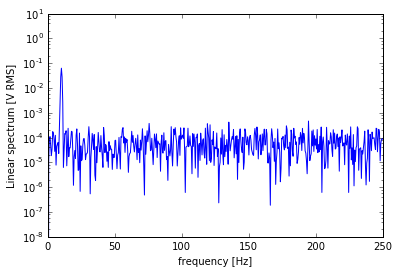

In [28]:
ff(sampling_frequency, shape=signal_shape)